# Final Data Science Project
## By: Sebastian Tucker-Kyriakos

In [254]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [256]:
# importing data
file_name = 'Data/train.csv'
DF = pd.read_csv(file_name)
show(DF)

## Questions: 

### Questions 1: Which Variables Have the Greatest Effect on Depression

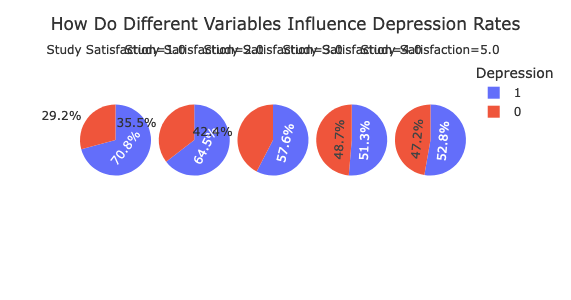

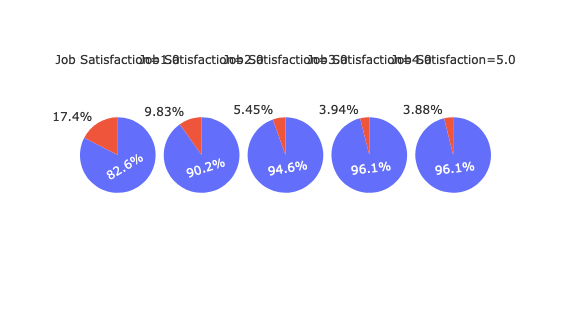

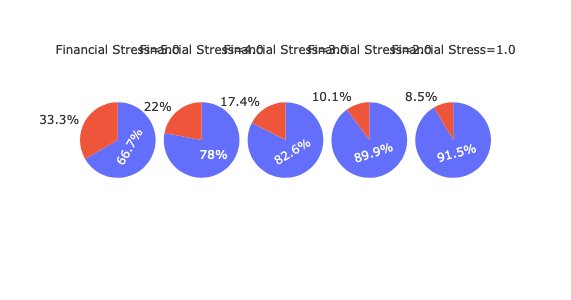

In [340]:
DF_Depression_Influence = (
DF.value_counts(subset=['Study Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Study Satisfaction', ascending=True)

)

fig = px.pie(DF_Depression_Influence, 
    values='count', 
    names = 'Depression',
    facet_col='Study Satisfaction',
    color = 'Depression',
)


fig.update_layout(
                  title='How Do Different Variables Influence Depression Rates',
                  template='ggplot2',
                  legend_title='Depression',
                  width=1000,
                  height=300,
                      )

fig.show()


DF_Depression_Influence = (
DF.value_counts(subset=['Job Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Job Satisfaction', ascending=True)

)

fig = px.pie(DF_Depression_Influence, 
    values='count', 
    facet_col='Job Satisfaction',
    color = 'Depression',
    facet_col_wrap = 5,
)


fig.update_layout(
                  template='ggplot2',
                  width=1000,
                  height=320,
                  yaxis_title="Job Satisfaction",
                      )

fig.show()


DF_Financial_Influence = (
DF.value_counts(subset=['Financial Stress', 'Depression']).reset_index(name='count').sort_values(by='Financial Stress', ascending=False)

)

fig = px.pie(DF_Financial_Influence, 
    values='count', 
    facet_col='Financial Stress',
    color = 'Depression',
    facet_col_wrap = 5,
)


fig.update_layout(
                  yaxis_title="Financial Stress",
                  template='ggplot2',
                  width=1000,
                  height=300,
                      
                      )

fig.show()

### How does age influence depression